In [1]:
import sys
import os
sys.path.insert(0, os.path.abspath('..'))

In [55]:
from maddux.robots import Link, Arm
from maddux.robots import simple_human_arm
from maddux.robots import utils
import numpy as np
from scipy.optimize import fsolve

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

%matplotlib inline

In [85]:
def find_release_velocity(start, end, time):
    """Find velocity needed to get from start to end in time seconds
    :param start: 1x3 numpy array of start location
    :param end: 1x3 numpy array of end location
    :param time: flight time desired
    """
    v = end - start
    vx, vy = v[:2]
    
    def find_vz(vz, z0, z, t):
        return (z - z0) + vz * t - 9.81 * t**2
    
    vz = fsolve(find_vz, 0, args=(start[2], end[2], t))[0]
    
    return (vx, vy, vz)

In [86]:
origin = np.array([0, 0, 2])
end = np.array([2, 10, 2])
find_path(origin, end, 1)

(2, 10, 9.8100000000000005)

In [87]:
lamb = np.linspace(0, 1, 100)

x = origin[0] + lamb * vx
y = origin[1] + lamb * vy
z = origin[2] + lamb * vz - 9.81 * lamb**2

(0, 10)

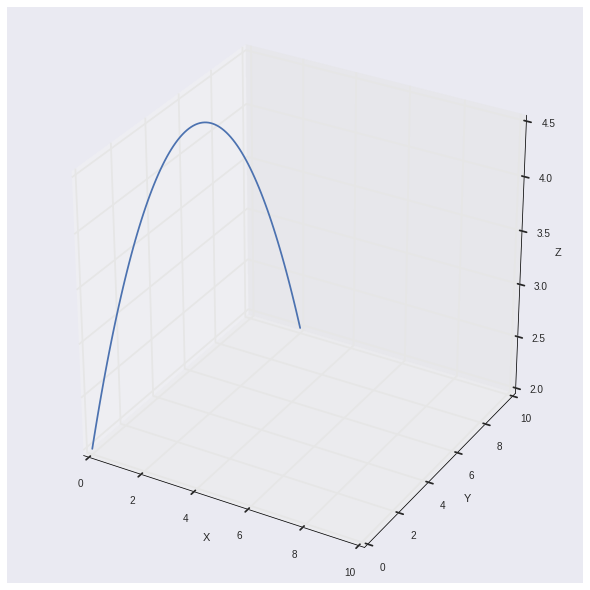

In [88]:
fig = plt.figure(figsize=(8, 8))
ax = Axes3D(fig)
ax.plot(x, y, z)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim([0, 10])
ax.set_ylim([0, 10])
ax.set_ylim([0, 10])

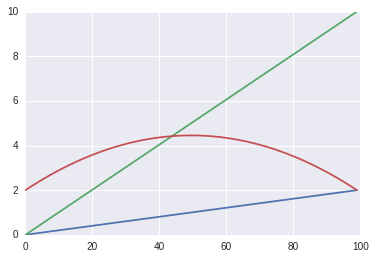

In [89]:
plt.plot(x)
plt.plot(y)
plt.plot(z)